In [1]:
# reload
%load_ext autoreload
%autoreload 2
%cd ../../

import numpy as np
import torch
from torchmetrics import MeanAbsoluteError
from datasets import Milan
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

/home/zzw/Code/milan/Spatio-Temporal-Analysis-Telecom-Italia


In [2]:
preds = np.load('experiments/results/1yvp9ob4/preds.npz')
preds = preds['arr_0']
print(preds.shape)

(1392, 900)


In [3]:
## prepare data
milan = Milan(time_range='30days', tele_column='internet')
milan.prepare_data()
milan.setup()
milan_train = np.concatenate((milan.milan_train, milan.milan_val), axis=0)
milan_test = milan.milan_test
milan_train = milan_train.reshape((milan_train.shape[0], -1))
milan_test = milan_test.reshape((milan_test.shape[0], -1))
milan_data = np.concatenate((milan_train, milan_test), axis=0)

milan_internet_30days_data.csv.gz already exists in data/sms-call-internet-mi
Loading Milan data...
loaded 4320 rows and 900 grids
train shape: (2448, 30, 30), val shape: (432, 30, 30), test shape: (1440, 30, 30)


In [5]:
gt = torch.tensor(milan_test[48:, :])
preds = torch.tensor(preds)
mae = MeanAbsoluteError()
mae(preds, gt)

tensor(30.9349)

In [6]:
gt = gt.numpy()
preds = preds.numpy()

100%|██████████| 900/900 [00:00<00:00, 6954.20it/s]


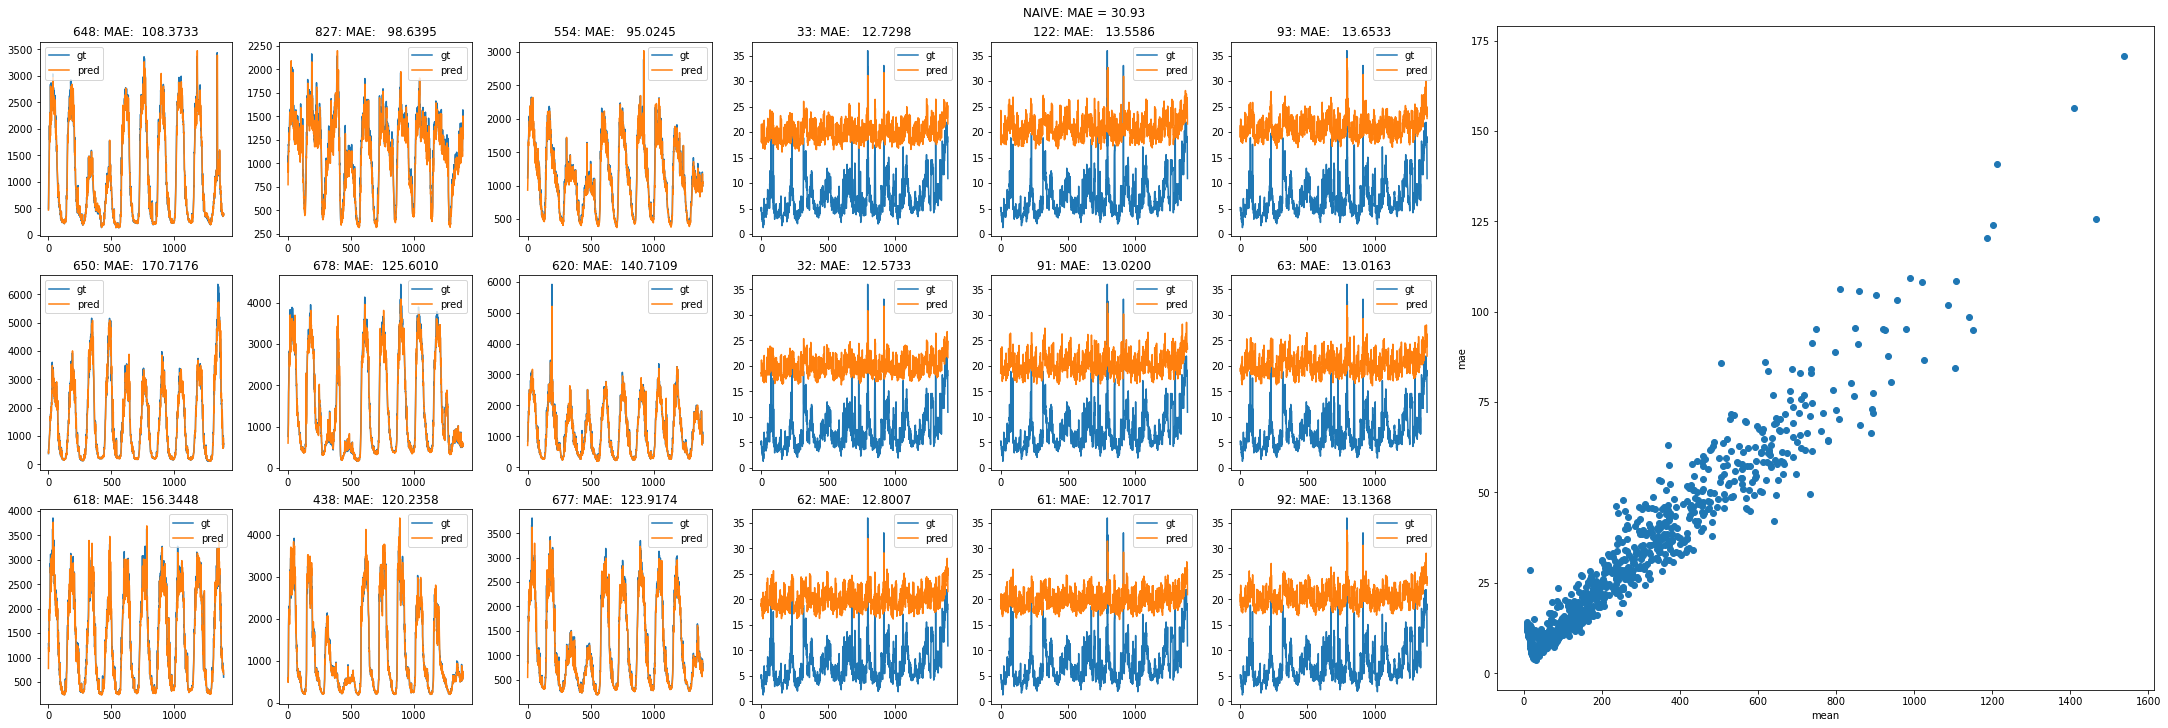

In [7]:
fig = plt.figure(figsize=(30, 10), constrained_layout=True)
fig.suptitle('NAIVE: MAE = {:.2f}'.format(mean_absolute_error(gt, preds)))

subfigs = fig.subfigures(1, 3)

axes = subfigs[0].subplots(3, 3)
top9ind = np.argpartition(np.mean(gt, axis=0), -9)[-9:]
for i in range(9):
    axes[i // 3, i % 3].plot(gt[:, top9ind[i]], label="gt")
    axes[i // 3, i % 3].plot(preds[:, top9ind[i]], label="pred")
    axes[i // 3, i % 3].set_title(f"{top9ind[i]}: MAE: {mean_absolute_error(preds[:, top9ind[i]], gt[:, top9ind[i]]):9.4f}")
    axes[i // 3, i % 3].legend()

axes = subfigs[1].subplots(3, 3)
low9ind = np.argpartition(np.mean(gt, axis=0), 9)[:9]
for i in range(9):
    axes[i // 3, i % 3].plot(gt[:, low9ind[i]], label="gt")
    axes[i // 3, i % 3].plot(preds[:, low9ind[i]], label="pred")
    axes[i // 3, i % 3].set_title(f"{low9ind[i]}: MAE: {mean_absolute_error(preds[:, low9ind[i]], gt[:, low9ind[i]]):9.4f}")
    axes[i // 3, i % 3].legend()

maes = []
for i in tqdm(range(preds.shape[1])):
    maes.append(mean_absolute_error(preds[:, i], gt[:, i]))
# plt scatter x = mean y = maes
ax = subfigs[2].subplots(1, 1)
ax.scatter(np.mean(gt, axis=0), maes)
# set x axis label to 'mean_values'
ax.set_xlabel('mean')
ax.set_ylabel('mae')

fig.show()